In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K

In [5]:
def transform_dense_to_sparse_data(ratings):
    user_item_matrix = ratings.pivot(*ratings.columns)
    user_item_matrix = user_item_matrix.fillna(0)
    user_item_matrix.columns = user_item_matrix.columns.astype(str)
    return user_item_matrix

In [2]:
# load original data
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

In [40]:
# Transform dense to sparse
sparse_data = transform_dense_to_sparse_data(orig_data)


In [41]:
sparse_data['sum'] = sparse_data.sum(axis=1)
sparse_data['nr_ratings'] = sparse_data.astype(bool).sum(axis=1)
sparse_data['mean'] = sparse_data['sum'].divide(sparse_data['nr_ratings'])

In [42]:
sparse_data

item,1,2,3,4,5,6,7,8,9,10,...,1676,1677,1678,1679,1680,1681,1682,sum,nr_ratings,mean
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0,273,3.597070
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,63,3.650794
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,55,2.745455
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,25,4.160000
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503.0,176,2.857955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,50,4.180000
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0,108,3.425926
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,23,3.869565


(array([  1.,   4.,   9.,  31.,  96., 195., 294., 211.,  87.,  15.]),
 array([1.48853211, 1.80634557, 2.12415902, 2.44197248, 2.75978593,
        3.07759939, 3.39541284, 3.7132263 , 4.03103976, 4.34885321,
        4.66666667]),
 <a list of 10 Patch objects>)

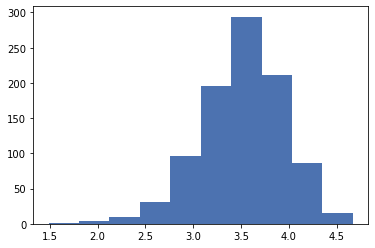

In [43]:
plt.hist(sparse_data['mean'])

(array([560., 183.,  96.,  55.,  25.,  15.,   5.,   1.,   1.,   2.]),
 array([ 21. ,  92.7, 164.4, 236.1, 307.8, 379.5, 451.2, 522.9, 594.6,
        666.3, 738. ]),
 <a list of 10 Patch objects>)

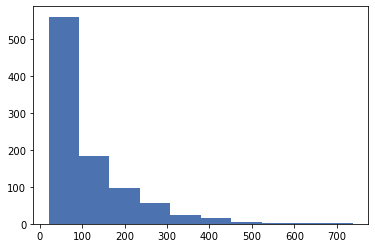

In [44]:
plt.hist(sparse_data['nr_ratings'])

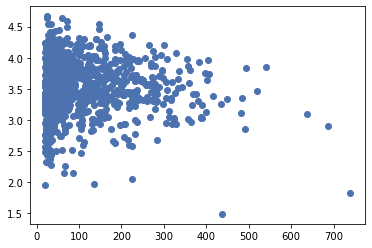

In [45]:
plt.scatter(sparse_data['nr_ratings'], sparse_data['mean'])

In [29]:
df_high_mean = sparse_data.loc[(sparse_data['mean'] > 3)]
df_low_mean = 
df_high_mean

item,1,2,3,4,5,6,7,8,9,10,...,1676,1677,1678,1679,1680,1681,1682,sum,mean,nr_ratings
user,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.0,8.038462,26
10,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1549.0,8.327957,186
12,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,8.471698,53
14,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,803.0,8.030000,100
16,5.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1213.0,8.542254,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,8.107143,28
923,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,615.0,8.092105,76
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301.0,8.852941,34
